<a href="https://colab.research.google.com/github/phxxebe/SETAssignment/blob/main/SET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression** - Preprocessing, Training and Testing

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics

In [ ]:
# importing the dataset in the dataframe
data = pd.read_csv("/content/sample_data/energydata_complete.csv")

In [ ]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


# Data Exploration

In [ ]:
# printing the number of rows and columns in the dataset
print('The number of rows in dataset are: ' , data.shape[0])
print('The number of columns in dataset are: ' , data.shape[1])

The number of rows in dataset are:  19735
The number of columns in dataset are:  29


In [ ]:
# number of null values in all columns
data.isnull().sum().sort_values(ascending = True)

date           0
Tdewpoint      0
Visibility     0
Windspeed      0
RH_out         0
Press_mm_hg    0
T_out          0
RH_9           0
T9             0
RH_8           0
T8             0
RH_7           0
T7             0
rv1            0
RH_6           0
RH_5           0
T5             0
RH_4           0
T4             0
RH_3           0
T3             0
RH_2           0
T2             0
RH_1           0
T1             0
lights         0
Appliances     0
T6             0
rv2            0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# 75% of the data is used for the training of the models and the rest is used for testing
train, test = train_test_split(data,test_size=0.25,random_state=40)

In [ ]:
# grouping the columns based on the type for clear column management 
col_time=["date"]
col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]
col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]
col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg","Windspeed","Visibility"]
col_light = ["lights"]
col_randoms = ["rv1", "rv2"]
col_target = ["Appliances"]

In [ ]:
# seperating dependent and independent variables 
feature_vars  = train[ col_time + col_temp + col_hum + col_weather + col_light + col_randoms ]
target_vars = train[col_target]

In [ ]:
# checking the distribution of values in lights column
feature_vars.lights.value_counts()

0     11438
10     1649
20     1230
30      414
40       64
50        5
60        1
Name: lights, dtype: int64

In [ ]:
# due to lot of zero enteries this column is of not much use and will be ignored in rest of the model
_ = feature_vars.drop(['lights'], axis=1 , inplace= True) ;

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
feature_vars.head(2)

,date,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,rv1,rv2
9544,2016-03-17 23:40:00,22.6,19.5,21.50,22.89,19.166667,2.863333,21.0,22.89,19.89,34.70,37.863333,35.345,33.663333,71.263333,57.826667,26.89,38.5,37.26,2.233333,0.4,87.666667,764.200000,1.333333,61.000000,43.195492,43.195492
19366,2016-05-25 04:40:00,23.7,21.0,25.39,23.60,19.890000,5.500000,23.0,24.20,22.60,40.29,42.900000,40.000,39.000000,37.900000,39.890000,35.09,43.4,44.59,6.266667,5.3,93.666667,757.233333,1.000000,25.333333,46.369677,46.369677


# Data Visualization

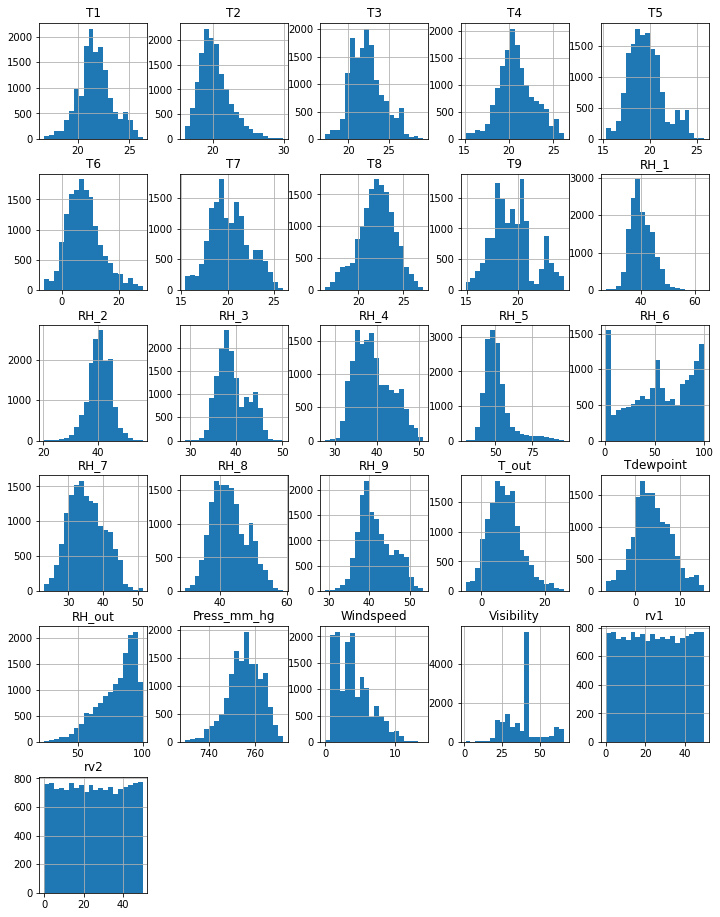

In [ ]:
# histogram of all the features to understand the distribution
feature_vars.hist(bins = 20 , figsize= (12,16)) ;

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

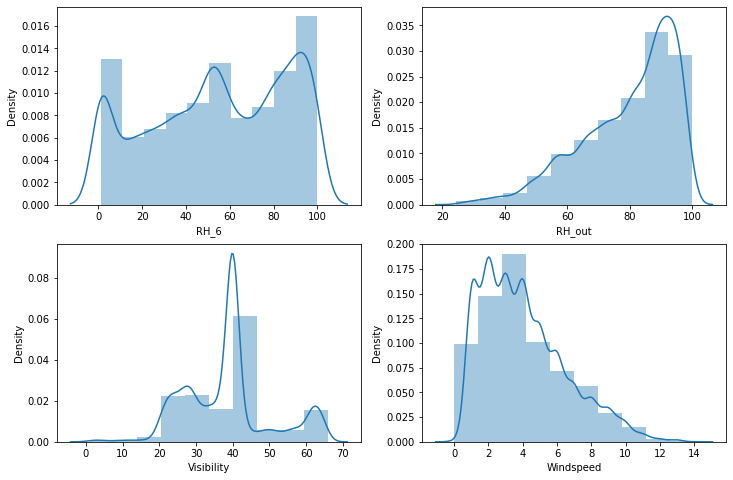

In [ ]:
# focussed displots for RH_6, RH_out, Visibility, Windspeed due to irregular distribution
f, ax = plt.subplots(2,2,figsize=(12,8))
vis1 = sns.distplot(feature_vars["RH_6"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(feature_vars["RH_out"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(feature_vars["Visibility"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(feature_vars["Windspeed"],bins=10, ax=ax[1][1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


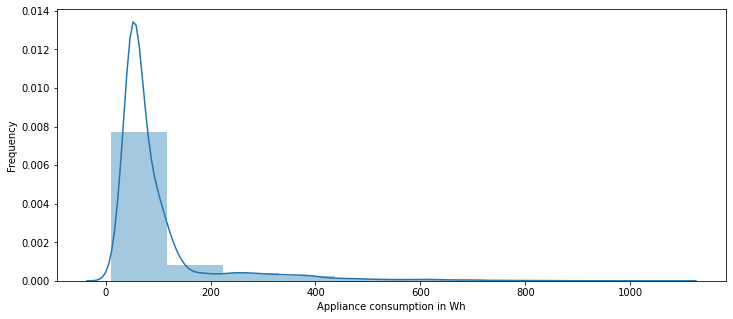

In [ ]:
# distribution of values in the Appliances column
f = plt.figure(figsize=(12,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(target_vars , bins=10 )

In [ ]:
# spliting training dataset into independent and dependent varibales
train_X = train[feature_vars.columns]
train_y = train[target_vars.columns]
train_X.drop(['date'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# splitting testing dataset into independent and dependent variables
test_X = test[feature_vars.columns]
test_y = test[target_vars.columns]

In [ ]:
# columns to be removed
train_X.drop(["rv1","rv2","Visibility","T6","T9"],axis=1 , inplace=True)
test_X.drop(["rv1","rv2","Visibility","T6","T9","date"], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train_X.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'RH_1', 'RH_2', 'RH_3',
       'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out', 'Tdewpoint',
       'RH_out', 'Press_mm_hg', 'Windspeed'],
      dtype='object')

In [ ]:
test_X.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'RH_1', 'RH_2', 'RH_3',
       'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out', 'Tdewpoint',
       'RH_out', 'Press_mm_hg', 'Windspeed'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# creating the test and training set by including the Appliances column
train = train[list(train_X.columns.values) + col_target ]
test = test[list(test_X.columns.values) + col_target ]

# creating dummy test and training set to hold scaled values
sc_train = pd.DataFrame(columns=train.columns , index=train.index)
sc_train[sc_train.columns] = sc.fit_transform(train)
sc_test= pd.DataFrame(columns=test.columns , index=test.index)
sc_test[sc_test.columns] = sc.fit_transform(test)

In [ ]:
sc_train.head()

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Appliances
9544,0.569827,-0.383584,-0.384018,0.996241,-0.229230,0.349500,0.441571,-1.398755,-0.629413,-1.197521,-1.234796,2.267242,0.103642,-1.657784,-0.848083,-1.033732,-0.978251,-0.803979,0.529878,1.167725,-1.112160,-0.270443
19366,1.254979,0.298556,1.561061,1.344290,0.163277,1.299615,1.112907,0.004687,0.604569,0.228904,-0.009491,-1.454588,-0.471944,-0.060622,0.086994,0.725258,-0.217827,0.365687,0.931169,0.226014,-1.248270,-0.464759
10816,0.320681,0.054501,0.366012,-0.229283,0.145189,0.297243,0.822507,1.388043,1.101918,-0.212353,1.045908,-0.101804,-0.676999,0.311400,0.163327,-0.049050,1.120770,0.803317,-0.896934,-0.733721,0.929492,0.021032
15457,-0.246127,-0.961129,-0.489022,-0.159019,-0.162305,-0.363087,0.087967,-1.125096,-0.629413,-1.367589,-0.852893,1.009651,-0.110291,-1.110463,0.001120,-1.368892,-1.339609,-1.006881,0.975757,-0.046587,-0.839939,-0.561918
2956,-0.246127,-0.024324,-0.300681,-1.013618,-0.061616,-0.579502,-0.564579,1.789743,1.680118,2.300361,2.332439,0.137914,1.453771,3.043131,2.777725,2.719419,0.630579,1.400086,0.864287,0.419763,1.065602,-0.464759


In [ ]:
sc_test.head()

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Appliances
6314,-0.678526,-0.337714,-0.758967,-0.272083,-0.811540,-0.409392,-0.946375,-0.352449,-0.426736,0.306431,-0.401012,-0.143165,1.086122,-0.407472,-0.731388,-0.437093,-0.232839,-1.157146,-1.318014,0.377392,-0.809142,-0.367942
12257,0.814344,0.289201,1.432662,0.317741,1.062631,0.811654,1.049857,0.671740,1.084770,-0.220306,0.536605,2.416950,-1.056634,-0.276865,-0.989635,-0.554766,0.865496,0.485626,-0.967649,-0.401660,0.004891,3.087003
6271,-0.850621,-1.058130,-0.526796,-0.515812,-0.654758,-0.600348,-0.929458,-0.182731,0.160016,0.427270,-0.182312,0.788775,0.869462,0.702690,0.538598,0.705174,-1.611203,-1.275901,1.191050,0.616061,-0.876978,-0.664080
18179,0.938750,0.485399,0.955147,1.146419,1.134714,1.502863,1.400044,-0.419664,-0.511502,-0.885589,-0.687958,-1.035579,-1.365905,-0.346975,-0.678579,-1.043214,0.591690,0.568755,-0.323430,0.701622,-1.216158,-0.565367
9661,0.005706,-0.368370,-0.396714,-0.137220,-0.595289,-0.270881,0.339334,-0.797748,-0.320955,-1.037265,-1.182747,-0.564532,0.039148,-1.025548,-1.028276,-1.198139,-0.307513,-0.001268,0.524227,0.917775,0.004891,0.224334


In [ ]:
# removing Appliances column from the traininig and testing set
train_X =  sc_train.drop(['Appliances'] , axis=1)
train_y = sc_train['Appliances']
test_X =  sc_test.drop(['Appliances'] , axis=1)
test_y = sc_test['Appliances']

In [ ]:
train_X.head()

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed
9544,0.569827,-0.383584,-0.384018,0.996241,-0.229230,0.349500,0.441571,-1.398755,-0.629413,-1.197521,-1.234796,2.267242,0.103642,-1.657784,-0.848083,-1.033732,-0.978251,-0.803979,0.529878,1.167725,-1.112160
19366,1.254979,0.298556,1.561061,1.344290,0.163277,1.299615,1.112907,0.004687,0.604569,0.228904,-0.009491,-1.454588,-0.471944,-0.060622,0.086994,0.725258,-0.217827,0.365687,0.931169,0.226014,-1.248270
10816,0.320681,0.054501,0.366012,-0.229283,0.145189,0.297243,0.822507,1.388043,1.101918,-0.212353,1.045908,-0.101804,-0.676999,0.311400,0.163327,-0.049050,1.120770,0.803317,-0.896934,-0.733721,0.929492
15457,-0.246127,-0.961129,-0.489022,-0.159019,-0.162305,-0.363087,0.087967,-1.125096,-0.629413,-1.367589,-0.852893,1.009651,-0.110291,-1.110463,0.001120,-1.368892,-1.339609,-1.006881,0.975757,-0.046587,-0.839939
2956,-0.246127,-0.024324,-0.300681,-1.013618,-0.061616,-0.579502,-0.564579,1.789743,1.680118,2.300361,2.332439,0.137914,1.453771,3.043131,2.777725,2.719419,0.630579,1.400086,0.864287,0.419763,1.065602


In [ ]:
train_y.head()

9544    -0.270443
19366   -0.464759
10816    0.021032
15457   -0.561918
2956    -0.464759
Name: Appliances, dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

models = [
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()]
]

In [ ]:
# running all the proposed models and updating the information in a list model_data
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    model_data.append(curr_model_data)

In [ ]:
model_data

[{'Name': 'RandomForest ',
  'Test_R2_Score': 0.5557145977210723,
  'Test_RMSE_Score': 0.6665473743695399,
  'Train_R2_Score': 0.9393264177690678,
  'Train_Time': 31.40770387649536},
 {'Name': 'ExtraTreeRegressor :',
  'Test_R2_Score': 0.632617176565367,
  'Test_RMSE_Score': 0.6061211293418446,
  'Train_R2_Score': 1.0,
  'Train_Time': 7.460801839828491}]

In [ ]:
df = pd.DataFrame(model_data)
df

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,RandomForest,31.407704,0.939326,0.555715,0.666547
1,ExtraTreeRegressor :,7.460802,1.000000,0.632617,0.606121


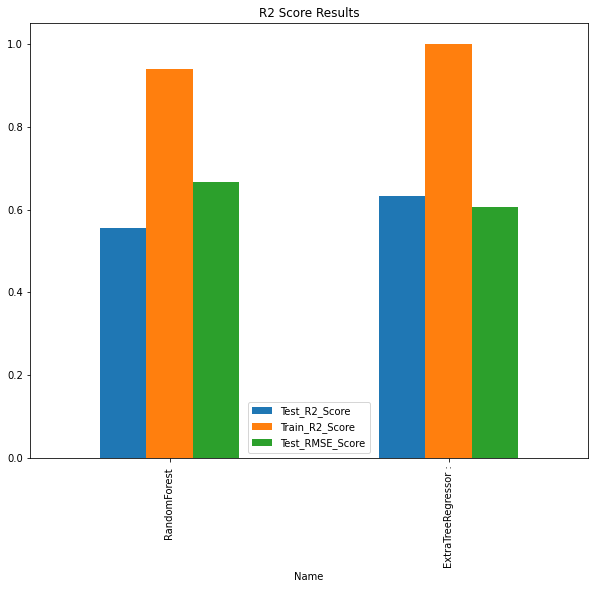

In [ ]:
df.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'] , kind="bar", title = 'R2 Score Results' , figsize= (10,8)) ;